In [1]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
from IPython.display import display
from collections import defaultdict
import datetime as dt
from datetime import timedelta

In [2]:
dataset = pd.read_csv("DP_online_retail_II.csv")

In [3]:
# sort by InvoiceDate and reset the index
csv_data = dataset.sort_values(by = 'InvoiceDate').reset_index(drop = True)
csv_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
# I prepared a function for reviewing the dataset.
def Df_info(df):
    print("########### Head ###########")
    print(df.head())
    print("########### Tail ###########")
    print(df.tail())
    print("########### Shape ###########")
    print(df.shape)
    print("########### Info ###########")
    print(df.info())
    print("########### Info ###########")
    print(df.columns)
    print("########### Quantiles ###########")
    print(df.describe().T)
    print("########### NA ###########")
    print(df.isnull().sum())

In [5]:
Df_info(csv_data)

########### Head ###########
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
########### Tail ###########
        Invoice StockCode                     Description  Quantity  \
1067366  581587     22555       PLASTERS IN TIN STRONGMAN        12   
1067367  5815

In [6]:
print('The number of duplicate data records: ', csv_data.duplicated().sum())

The number of duplicate data records:  34335


In [7]:
csv_data.drop_duplicates(inplace=True) # remove duplicate rows
print('The number of duplicate data records after removing duplicates: ', csv_data.duplicated().sum()) #re-check 

The number of duplicate data records after removing duplicates:  0


In [8]:
def check_codes(df, col):
    '''
    check for non-int characters and their positions in string entries in col
    takes a dataframe, col. returns unique non-int characters and their positions
    '''
    string_positions = defaultdict(int)
    # check if the character in  string converts to int,
    # if valueError, add the character and its position to string_positions dict
    for item in df[col].values:
        item = str(item)  # make sure it is string
        for char in item:
            try:
                is_int = int(char)
            except ValueError:
                string_positions[(char, item.index(char))] += 1
    return string_positions

In [9]:
# check the structure of the Invoice column
invoice_col_len = csv_data['Invoice'].apply(lambda x: len(str(x)))  # length of entries
print('The length of each Invoice')
print(invoice_col_len.value_counts())
print('The non-Int characters and their positions within Invoice', check_codes(csv_data, 'Invoice'))

The length of each Invoice
6    1013926
7      19110
Name: Invoice, dtype: int64
The non-Int characters and their positions within Invoice defaultdict(<class 'int'>, {('C', 0): 19104, ('A', 0): 6})


In [10]:
# dataset ordered from lowest price to highest price
csv_data.sort_values(by = "Price", ascending  = True).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [11]:
# dataset ordered from highest price to lowest price
csv_data.sort_values(by = "Price", ascending  = False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
748142,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom
241826,C512770,M,Manual,-1,2010-06-17 16:52:00,25111.09,17399.0,United Kingdom
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111.09,NaN,United Kingdom
320581,C520667,BANK CHARGES,Bank Charges,-1,2010-08-27 13:42:00,18910.69,NaN,United Kingdom
1050063,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom


In [12]:
csv_data.dropna(subset = ['Customer ID'], inplace = True) # drop null Customer ID
csv_data['Invoice'] = csv_data['Invoice'].astype(str) # set Invoice dtype to string
csv_data['Customer ID'] = csv_data['Customer ID'].astype(int) # set Customer ID column to int
csv_data['InvoiceDate'] = pd.to_datetime(csv_data['InvoiceDate']) # change the type of InvoiceDate column to datetime
max(csv_data['InvoiceDate']) #check last day of data to choose reference date
ref_date = dt.datetime(2011, 12, 16)

In [13]:
# Get values not starting with 'C'.
pos_inv = csv_data.copy()
pos_inv = pos_inv[(~pos_inv['Invoice'].str.contains('C', na = False))]

In [14]:
pos_inv["TotalValue"] = pos_inv["Quantity"] * pos_inv["Price"] # calculate the TotalValue column and add it to the dataset.
monetary = pos_inv[['Customer ID','TotalValue']].groupby('Customer ID').agg(Monetary = ('TotalValue', 'sum')) # monetary value

In [15]:
# number of positive orders
frequency = pos_inv[['Customer ID','InvoiceDate']].groupby('Customer ID').agg(Frequency = ('InvoiceDate', 'count'))
# last positive order date
recency = pos_inv[['Customer ID','InvoiceDate']].groupby('Customer ID').agg(Recency = ('InvoiceDate', 'max'))

In [16]:
# check number of customers without a positive order but with negative orders
customers_negative_orders = monetary[~monetary.index.isin(recency.index)].index
print('There is {} customers with only negative value orders and not a single postive value order'.format(len(customers_negative_orders)))

There is 0 customers with only negative value orders and not a single postive value order


In [17]:
# create a clean user RFM dataset with only users with at least one positive order
rfm = pd.merge(recency, frequency, left_index=True, right_index=True, how = 'inner')
rfm = pd.merge(rfm, monetary, left_index=True, right_index=True, how = 'inner')
# round the Monetary value to 2 decimal places
rfm['Monetary'] = rfm['Monetary'].apply(lambda x: round(x, 2))
# add reference date to RFM dataset
rfm['ref_date'] = dt.datetime(2011,12,16)
rfm['ref_date'] = rfm['ref_date'].astype("datetime64[ns]")
rfm

,Recency,Frequency,Monetary,ref_date
Customer ID,,,,
12346,2011-01-18 10:01:00,34,77556.46,2011-12-16
12347,2011-12-07 15:52:00,222,4921.53,2011-12-16
12348,2011-09-25 13:13:00,51,2019.40,2011-12-16
12349,2011-11-21 09:51:00,175,4428.69,2011-12-16
12350,2011-02-02 16:01:00,17,334.40,2011-12-16
...,...,...,...,...
18283,2011-12-06 12:02:00,938,2664.90,2011-12-16
18284,2010-10-04 11:33:00,28,461.68,2011-12-16
18285,2010-02-17 10:24:00,12,427.00,2011-12-16


In [18]:
# check features of RFM dataset
Df_info(rfm)

########### Head ###########
                        Recency  Frequency  Monetary   ref_date
Customer ID                                                    
12346       2011-01-18 10:01:00         34  77556.46 2011-12-16
12347       2011-12-07 15:52:00        222   4921.53 2011-12-16
12348       2011-09-25 13:13:00         51   2019.40 2011-12-16
12349       2011-11-21 09:51:00        175   4428.69 2011-12-16
12350       2011-02-02 16:01:00         17    334.40 2011-12-16
########### Tail ###########
                        Recency  Frequency  Monetary   ref_date
Customer ID                                                    
18283       2011-12-06 12:02:00        938   2664.90 2011-12-16
18284       2010-10-04 11:33:00         28    461.68 2011-12-16
18285       2010-02-17 10:24:00         12    427.00 2011-12-16
18286       2010-08-20 11:57:00         67   1296.43 2011-12-16
18287       2011-10-28 09:29:00        155   4182.99 2011-12-16
########### Shape ###########
(5881, 4)
######

In [19]:
# convert Recency characteristics to numeric
rfm['Recency'] = pd.to_datetime(rfm['Recency'])
rfm['Recency'] = rfm['ref_date'] - rfm['Recency']
rfm['Recency'] = pd.to_numeric(rfm['Recency'].dt.days.astype('int64'))
# drop reference date column due to its necessity
rfm.drop(['ref_date'], axis = 1, inplace=True)
# review RFM dataset
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,331,34,77556.46
12347,8,222,4921.53
12348,81,51,2019.40
12349,24,175,4428.69
12350,316,17,334.40


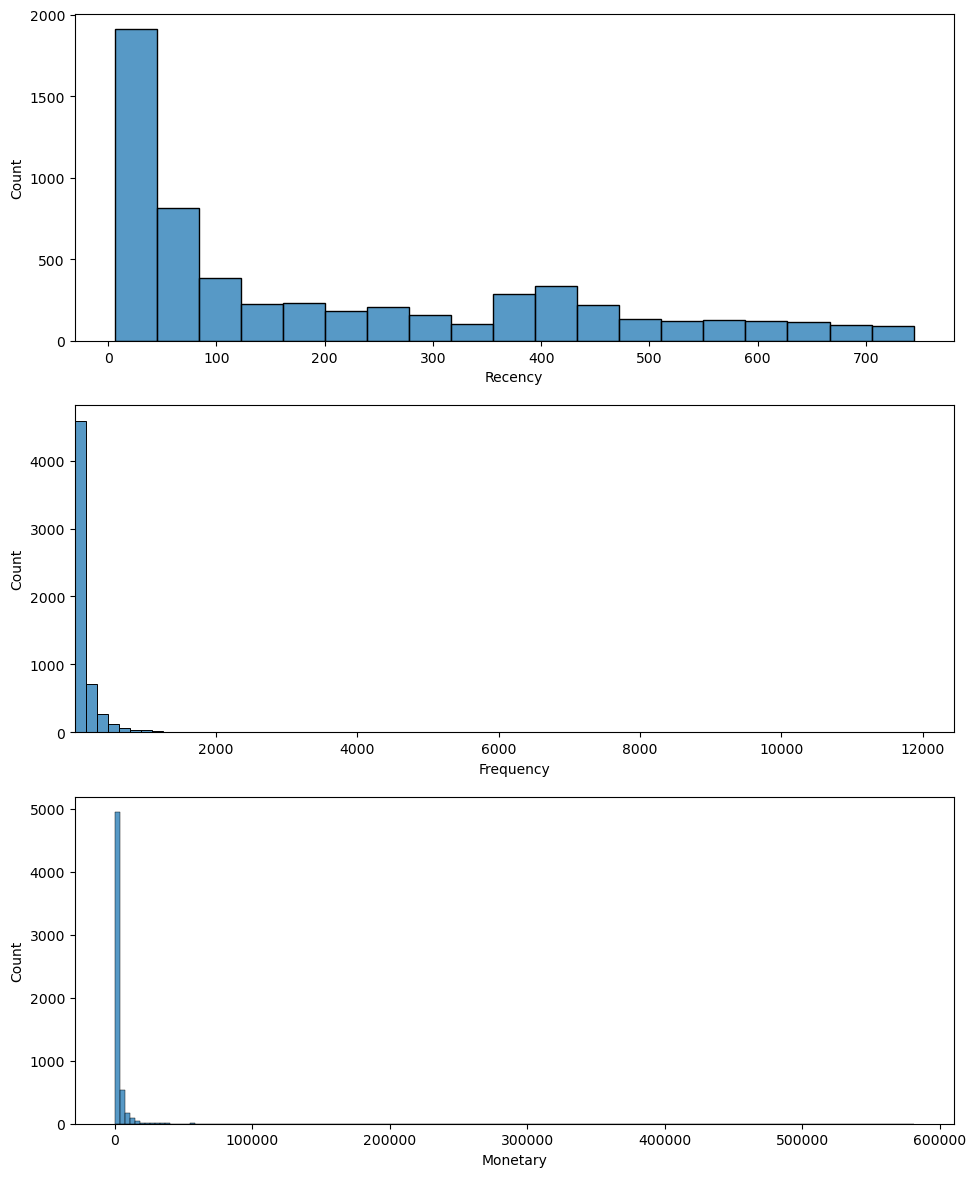

In [20]:
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
rfm.replace([np.inf, -np.inf], np.nan, inplace=True)
rfm.dropna(subset=['Recency', 'Frequency', 'Monetary'], inplace=True)
# plot the distribution of RFM values
fig, axs = plt.subplots(3, 1, figsize=(10, 12))
sns.histplot(rfm['Recency'], label='Recency', ax=axs[0]) # Plot Recency
min_F = rfm['Frequency'].min()
max_F = rfm['Frequency'].max()
axs[1].set_xlim(min_F, max_F)  # Set x-axis limits
sns.histplot(rfm['Frequency'], label='Frequency', ax=axs[1], bins = 80) # Plot Frequency
min_M = rfm['Monetary'].min()
max_M = rfm['Monetary'].max()
sns.histplot(rfm['Monetary'], label='Monetary', ax=axs[2], bins = 160) # Plot Monetary
plt.style.use('fivethirtyeight') # Apply the 'fivethirtyeight' style
plt.tight_layout() # Adjust layout
plt.show()

In [21]:
rfm[rfm['Monetary'] == 0] # check Monetary values equal to 0
rfm = rfm.replace(0, float('nan')) # replace 0 with NaN
rfm = rfm.dropna() # drop rows with all NaN values

In [22]:
# Perform log transformation to bring data into normal or near normal distribution
log_rfm = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [23]:
Df_info(log_rfm)

########### Head ###########
             Recency  Frequency  Monetary
Customer ID                              
12346          5.802      3.526    11.259
12347          2.079      5.403     8.501
12348          4.394      3.932     7.611
12349          3.178      5.165     8.396
12350          5.756      2.833     5.812
########### Tail ###########
             Recency  Frequency  Monetary
Customer ID                              
18283          2.197      6.844     7.888
18284          6.080      3.332     6.135
18285          6.501      2.485     6.057
18286          6.178      4.205     7.167
18287          3.871      5.043     8.339
########### Shape ###########
(5878, 3)
########### Info ###########
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5878 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    5878 non-null   float64
 1   Frequency  5878 non-null   float64
 2   Monetary 

<Axes: xlabel='Monetary', ylabel='Count'>

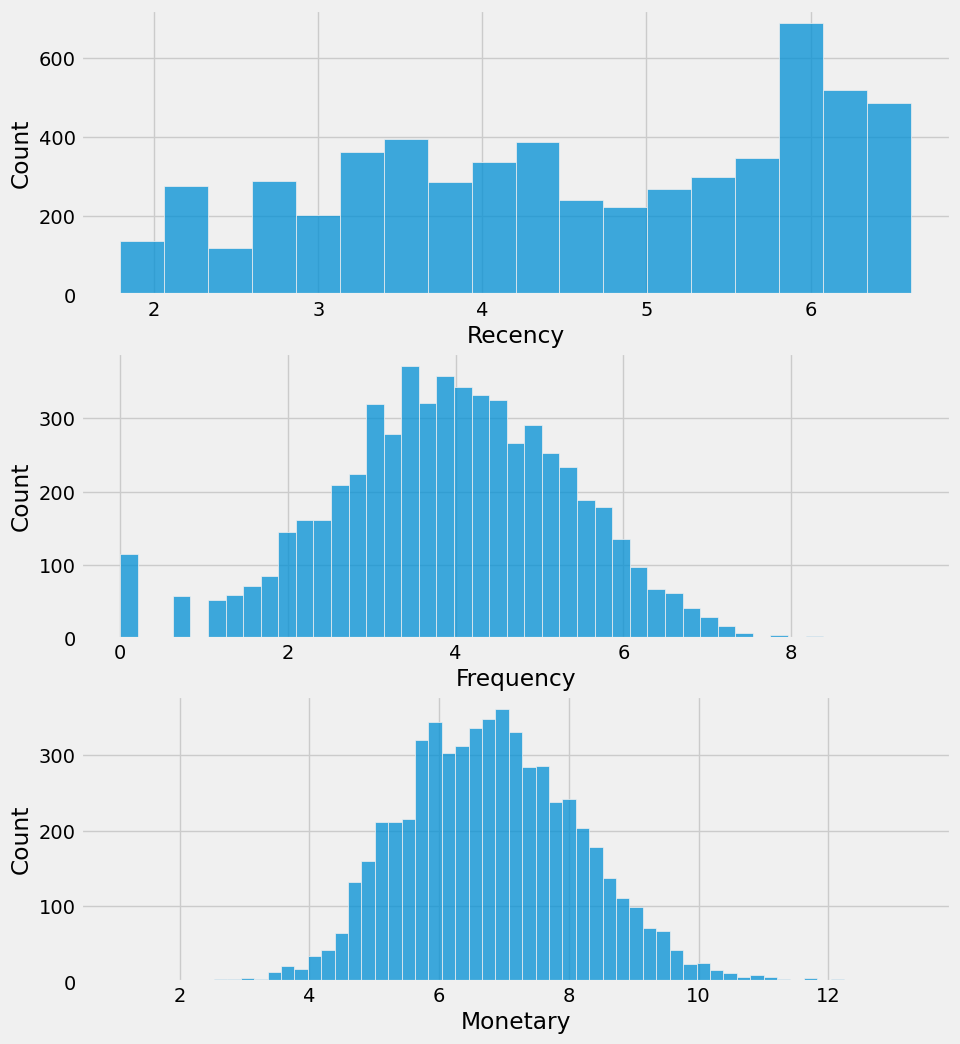

In [24]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))
sns.histplot(log_rfm['Recency'], label='R', ax=axs[0]) 
sns.histplot(log_rfm['Frequency'], label='F', ax=axs[1])
sns.histplot(log_rfm['Monetary'], label='M', ax=axs[2]) 

In [25]:
Q1_F = np.percentile(log_rfm['Frequency'], 25, interpolation = 'midpoint') 
Q2_F = np.percentile(log_rfm['Frequency'], 50, interpolation = 'midpoint') 
Q3_F = np.percentile(log_rfm['Frequency'], 75, interpolation = 'midpoint') 
IQR_F = Q3_F - Q1_F
lower_F = Q1_F - 1.5 * IQR_F
upper_F = Q3_F + 1.5 * IQR_F
outlier_F =[]
for x in log_rfm['Frequency']:
    if ((x> upper_F) or (x<lower_F)):
         outlier_F.append(x)
print(f"Number of outliers in 'Frequency': {len(outlier_F)}")

Q1_M = np.percentile(log_rfm['Monetary'], 25, interpolation = 'midpoint') 
Q2_M = np.percentile(log_rfm['Monetary'], 50, interpolation = 'midpoint') 
Q3_M = np.percentile(log_rfm['Monetary'], 75, interpolation = 'midpoint') 
IQR_M = Q3_M - Q1_M
lower_M = Q1_M - 1.5 * IQR_M
upper_M = Q3_M + 1.5 * IQR_M
outlier_M =[]
for x in log_rfm['Monetary']:
    if ((x> upper_M) or (x<lower_M)):
         outlier_M.append(x)
print(f"Number of outliers in 'Monetary': {len(outlier_M)}")

Number of outliers in 'Frequency': 129
Number of outliers in 'Monetary': 58


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11620\673644310.py:1: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11620\673644310.py:2: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11620\673644310.py:3: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)

C:\Users\ADMIN\AppData\Local\Temp\

In [26]:
# create a copy of log_rfm data
log_rfm_rmo = log_rfm.copy()

# Create arrays of Boolean values indicating the outlier rows
upper_array_F = log_rfm_rmo['Frequency'] > upper_F
lower_array_F = log_rfm_rmo['Frequency'] < lower_F

# Combine the masks to identify all outliers
outlier_mask_F = upper_array_F | lower_array_F

# Removing the outliers of Frequency
log_rfm_rmo = log_rfm_rmo[~outlier_mask_F]

In [27]:
# Create arrays of Boolean values indicating the outlier rows
upper_array_M = log_rfm_rmo['Monetary'] > upper_M
lower_array_M = log_rfm_rmo['Monetary'] < lower_M

# Combine the masks to identify all outliers
outlier_mask_M = upper_array_M | lower_array_M

# Removing the outliers of Frequency
log_rfm_rmo = log_rfm_rmo[~outlier_mask_M]

In [28]:
Q1_F = np.percentile(log_rfm_rmo['Frequency'], 25, interpolation = 'midpoint') 
Q2_F = np.percentile(log_rfm_rmo['Frequency'], 50, interpolation = 'midpoint') 
Q3_F = np.percentile(log_rfm_rmo['Frequency'], 75, interpolation = 'midpoint') 
IQR_F = Q3_F - Q1_F
lower_F = Q1_F - 1.5 * IQR_F
upper_F = Q3_F + 1.5 * IQR_F
outlier_F =[]
for x in log_rfm_rmo['Frequency']:
    if ((x> upper_F) or (x<lower_F)):
         outlier_F.append(x)
print(f"Number of outliers in 'Frequency': {len(outlier_F)}")

Q1_M = np.percentile(log_rfm_rmo['Monetary'], 25, interpolation = 'midpoint') 
Q2_M = np.percentile(log_rfm_rmo['Monetary'], 50, interpolation = 'midpoint') 
Q3_M = np.percentile(log_rfm_rmo['Monetary'], 75, interpolation = 'midpoint') 
IQR_M = Q3_M - Q1_M
lower_M = Q1_M - 1.5 * IQR_M
upper_M = Q3_M + 1.5 * IQR_M
outlier_M =[]
for x in log_rfm_rmo['Monetary']:
    if ((x> upper_M) or (x<lower_M)):
         outlier_M.append(x)
print(f"Number of outliers in 'Monetary': {len(outlier_M)}")

Number of outliers in 'Frequency': 1
Number of outliers in 'Monetary': 3


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11620\2319366815.py:1: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11620\2319366815.py:2: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11620\2319366815.py:3: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)

C:\Users\ADMIN\AppData\Local\Te

In [29]:
Df_info(log_rfm_rmo)

########### Head ###########
             Recency  Frequency  Monetary
Customer ID                              
12347          2.079      5.403     8.501
12348          4.394      3.932     7.611
12349          3.178      5.165     8.396
12350          5.756      2.833     5.812
12351          5.943      3.045     5.707
########### Tail ###########
             Recency  Frequency  Monetary
Customer ID                              
18283          2.197      6.844     7.888
18284          6.080      3.332     6.135
18285          6.501      2.485     6.057
18286          6.178      4.205     7.167
18287          3.871      5.043     8.339
########### Shape ###########
(5713, 3)
########### Info ###########
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5713 entries, 12347 to 18287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    5713 non-null   float64
 1   Frequency  5713 non-null   float64
 2   Monetary 

{'whiskers': [<matplotlib.lines.Line2D at 0x1860c6f1450>,
 'caps': [<matplotlib.lines.Line2D at 0x18619309550>,
 'boxes': [<matplotlib.lines.Line2D at 0x186192c9010>,
 'medians': [<matplotlib.lines.Line2D at 0x1861930a590>,
 'fliers': [<matplotlib.lines.Line2D at 0x18619163810>,
 'means': []}

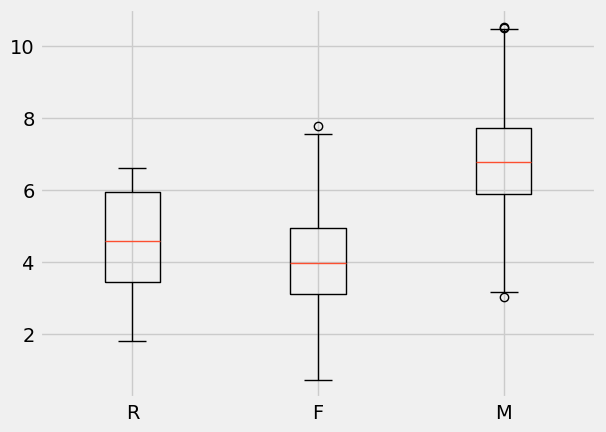

In [30]:
# Create a figure and axis
fig, ax = plt.subplots()
# Plot the boxplots
ax.boxplot([log_rfm_rmo['Recency'],log_rfm_rmo['Frequency'],log_rfm_rmo['Monetary']], labels=['R', 'F', 'M'])

In [31]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
s_scaler = StandardScaler()
log_rfm_rmo_scaled = s_scaler.fit_transform(log_rfm_rmo[['Recency', 'Frequency', 'Monetary']])
rfm_s_k = pd.DataFrame(log_rfm_rmo_scaled, columns=['R', 'F', 'M'])
print(rfm_s_k)

             R         F         M
0    -1.832821  1.082837  1.297052
1    -0.138505 -0.040992  0.607791
2    -1.028478  0.901008  1.215735
3     0.858323 -0.880616 -0.785444
4     0.995186 -0.718651 -0.866762
...        ...       ...       ...
5708 -1.746458  2.183746  0.822314
5709  1.095454 -0.499386 -0.535297
5710  1.403578 -1.146485 -0.595704
5711  1.167179  0.167577  0.263936
5712 -0.521282  0.807801  1.171591

[5713 rows x 3 columns]


{'whiskers': [<matplotlib.lines.Line2D at 0x1861d2b5a10>,
 'caps': [<matplotlib.lines.Line2D at 0x1861d2b7350>,
 'boxes': [<matplotlib.lines.Line2D at 0x1861d298f10>,
 'medians': [<matplotlib.lines.Line2D at 0x1861d2bc8d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x18619325350>,
 'means': []}

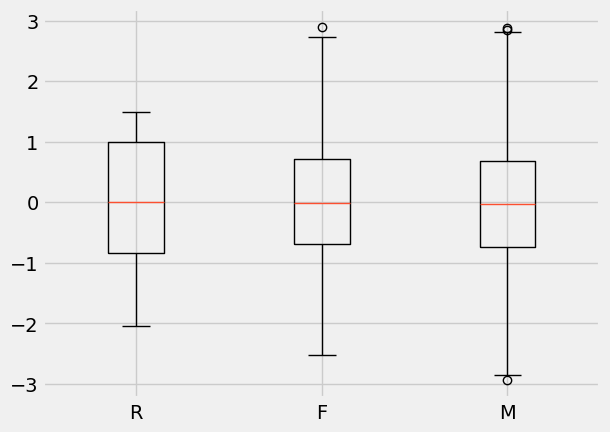

In [32]:
# Create a figure and axis
fig, ax = plt.subplots()
# Plot the boxplots
ax.boxplot([rfm_s_k['R'],rfm_s_k['F'],rfm_s_k['M']], labels=['R', 'F', 'M'])

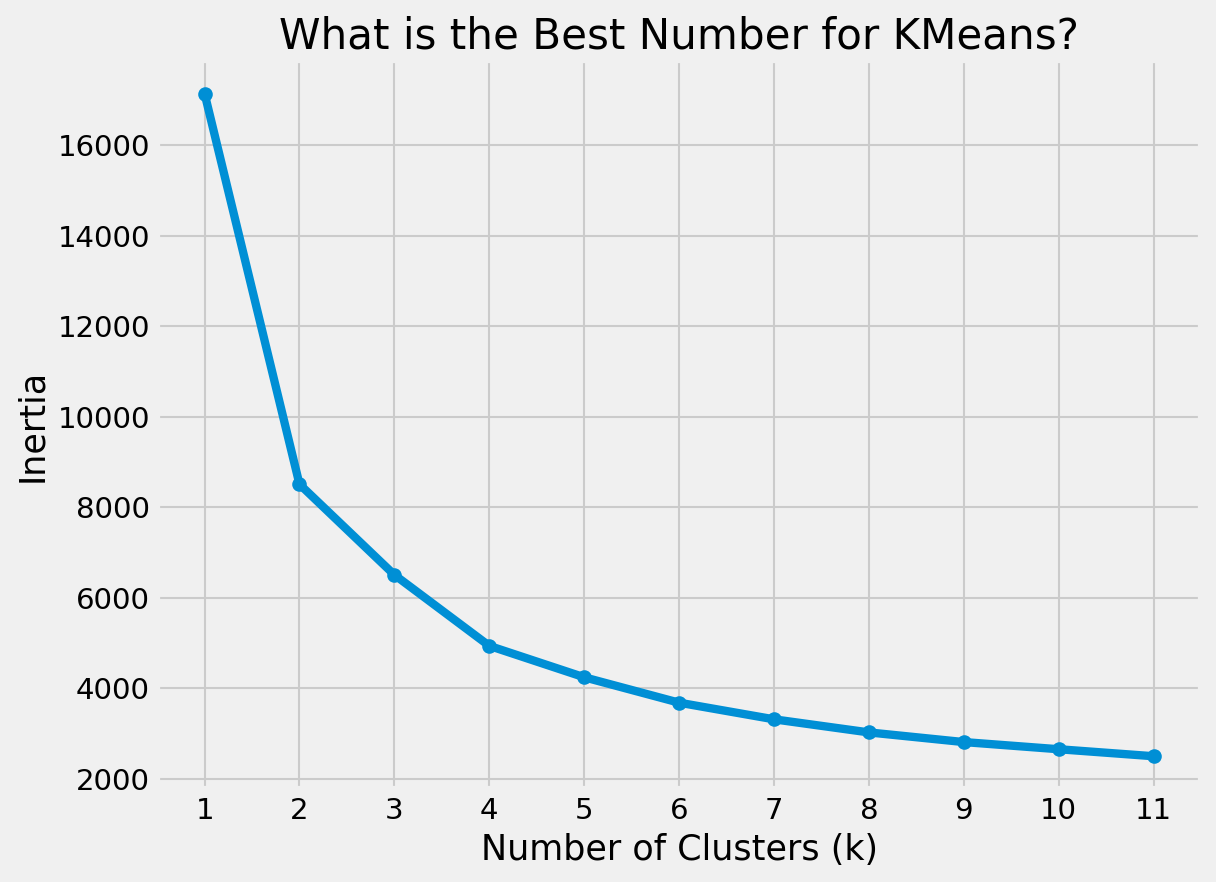

In [33]:
from sklearn.cluster import KMeans
# Extract RFM scores for K-means clustering
X = rfm_s_k[['R','F','M']]
# Calculate inertia (sum of squared distances) for different values of k
inertia = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, n_init= 10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
# Plot the elbow curve
plt.figure(figsize=(8, 6),dpi=150)
plt.plot(range(1, 12), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1,12))
plt.title('What is the Best Number for KMeans?')
plt.grid(True)
plt.show()

In [34]:
from sklearn.metrics import silhouette_samples, silhouette_score
ssd =[]
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, n_init= 10, random_state=42)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, kmeans.labels_)}')

Silhouette Score for 2 clusters: 0.4159496003512608
Silhouette Score for 3 clusters: 0.3158467200361011
Silhouette Score for 4 clusters: 0.34943637596374444
Silhouette Score for 5 clusters: 0.3219924672754063
Silhouette Score for 6 clusters: 0.30668463148742015
Silhouette Score for 7 clusters: 0.287927701677555
Silhouette Score for 8 clusters: 0.2849492862984195
Silhouette Score for 9 clusters: 0.27641632810597927
Silhouette Score for 10 clusters: 0.2822565861554029
Silhouette Score for 11 clusters: 0.2570877328618277


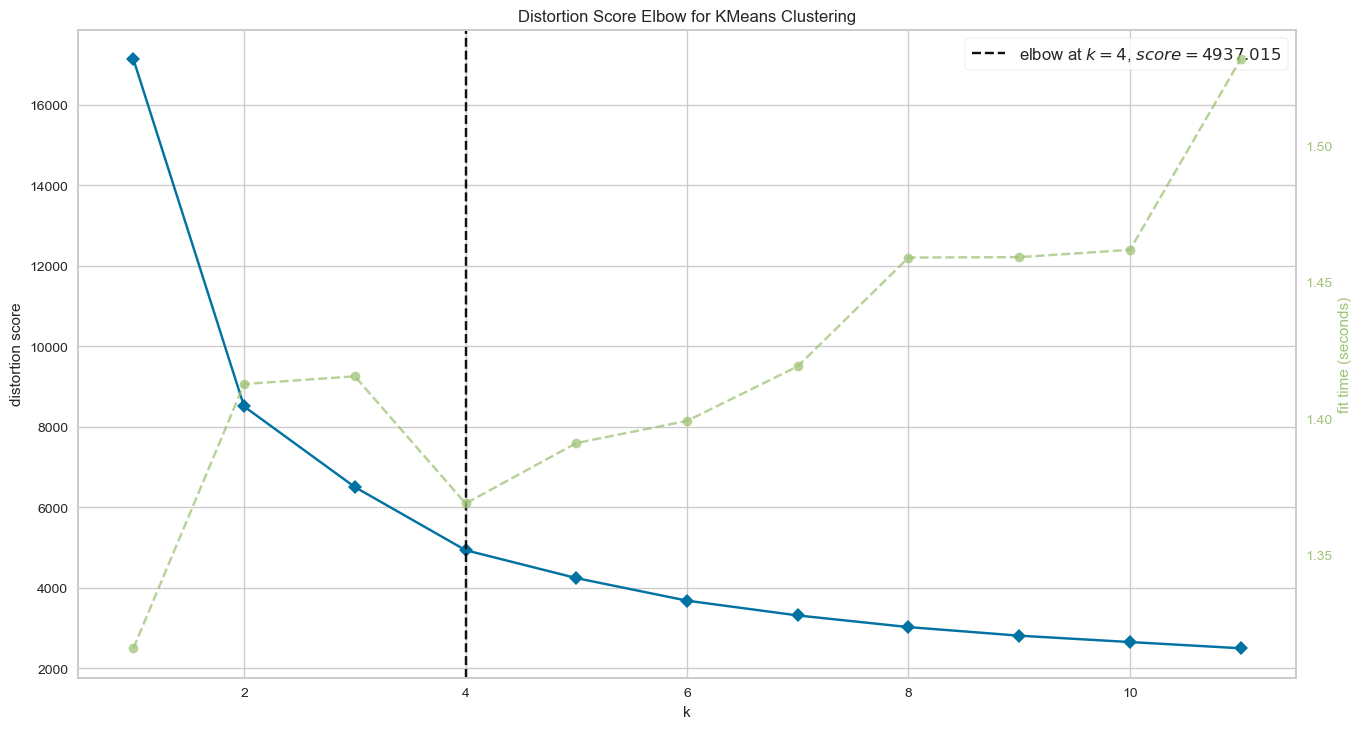

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(1, 12))

plt.figure(figsize=(14, 8))
visualizer.fit(rfm_s_k)        # Fit the data to the visualizer
visualizer.show() 

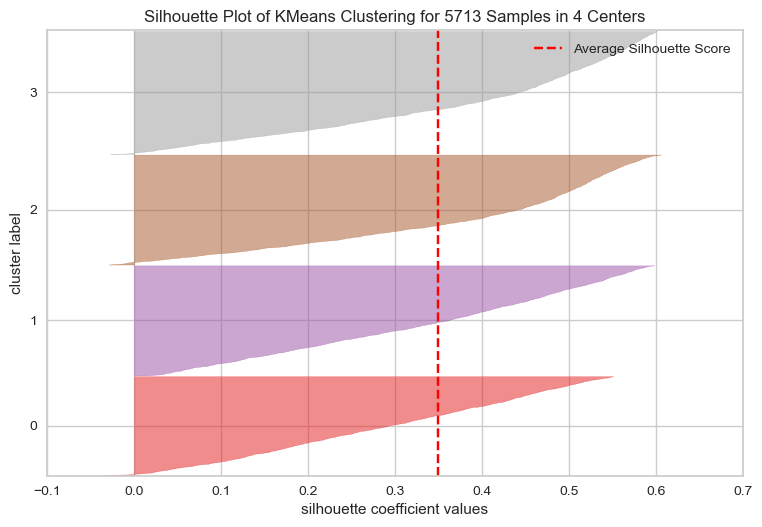

In [36]:
from yellowbrick.cluster import SilhouetteVisualizer
model_4 = KMeans(n_clusters=4, n_init = 10, random_state=42)
visualizer = SilhouetteVisualizer(model_4)

visualizer.fit(rfm_s_k)    # Fit the data to the visualizer
visualizer.poof();

In [37]:
kmeans = KMeans(n_clusters = 4, n_init = 10).fit(rfm_s_k)
kmeans.fit_predict(rfm_s_k)
labels = kmeans.labels_
log_rfm_rmo['ClusterID']=labels
log_rfm_rmo

,Recency,Frequency,Monetary,ClusterID
Customer ID,,,,
12347,2.079,5.403,8.501,1
12348,4.394,3.932,7.611,3
12349,3.178,5.165,8.396,1
12350,5.756,2.833,5.812,0
12351,5.943,3.045,5.707,0
...,...,...,...,...
18283,2.197,6.844,7.888,1
18284,6.080,3.332,6.135,0
18285,6.501,2.485,6.057,0


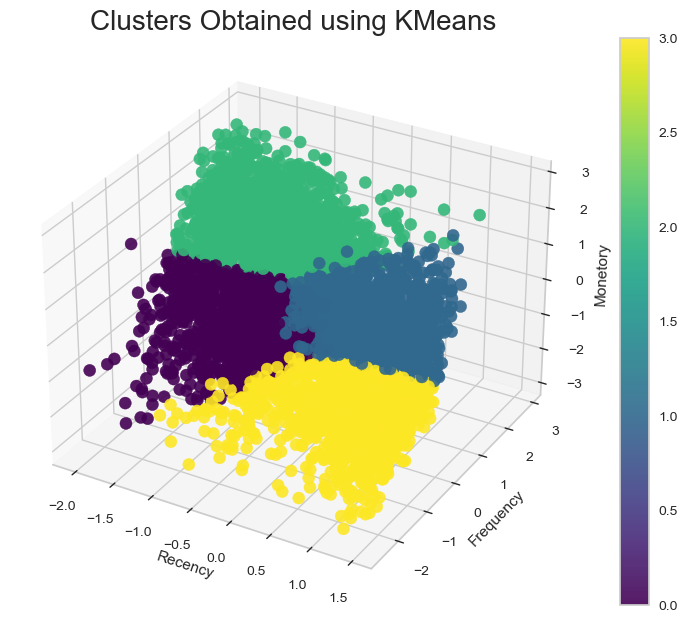

In [38]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection='3d')

# Plot the data points
scatter = ax.scatter(rfm_s_k['R'], rfm_s_k['F'], rfm_s_k['M'],
               c = model_4.labels_ , cmap = "viridis", s = 75, alpha=0.9)

plt.title('Clusters Obtained using KMeans',fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetory")
plt.colorbar(scatter)
plt.show()

In [39]:
log_rfm_rmo.ClusterID.value_counts()

0    1589
3    1424
1    1422
2    1278
Name: ClusterID, dtype: int64

In [40]:
log_rfm_rmo.groupby ('ClusterID').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max', 'count']})

Recency               Frequency                Monetary         \
               mean    min    max      mean    min    max      mean    min   
ClusterID                                                                    
0          5.829420  2.833  6.612  2.590943  0.693  4.304  5.447717  3.025   
1          3.250693  1.792  6.221  5.547278  3.219  7.778  8.386601  6.672   
2          3.468067  1.792  4.812  3.679038  0.693  5.366  6.490973  4.349   
3          5.524195  4.078  6.612  4.257723  0.693  6.422  7.107041  5.521   

                         
              max count  
ClusterID                
0           8.219  1589  
1          10.536  1422  
2           9.425  1278  
3          10.437  1424

In [41]:
log_rfm_rmo['Customer Type'] = log_rfm_rmo['ClusterID'].map({0:'Lost Customer', 1:'Best Customer', 2:'New Customer', 3:'At risk of leaving'})
log_rfm_rmo.sample(8) 

,Recency,Frequency,Monetary,ClusterID,Customer Type
Customer ID,,,,,
15009,2.890,5.193,7.138,1,Best Customer
13880,3.296,5.407,8.365,1,Best Customer
18109,1.946,6.483,9.165,1,Best Customer
12352,3.738,4.635,7.955,1,Best Customer
18129,5.517,2.639,4.723,0,At risk of leaving
16326,2.398,6.146,8.460,1,Best Customer
13381,3.611,5.875,9.015,1,Best Customer
12423,1.792,5.106,7.872,1,Best Customer


In [46]:
# importing Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
# building agglomerative clustering model
agglo = AgglomerativeClustering(n_clusters=4, compute_distances=True).fit(log_rfm[['Recency', 'Frequency', 'Monetary']])

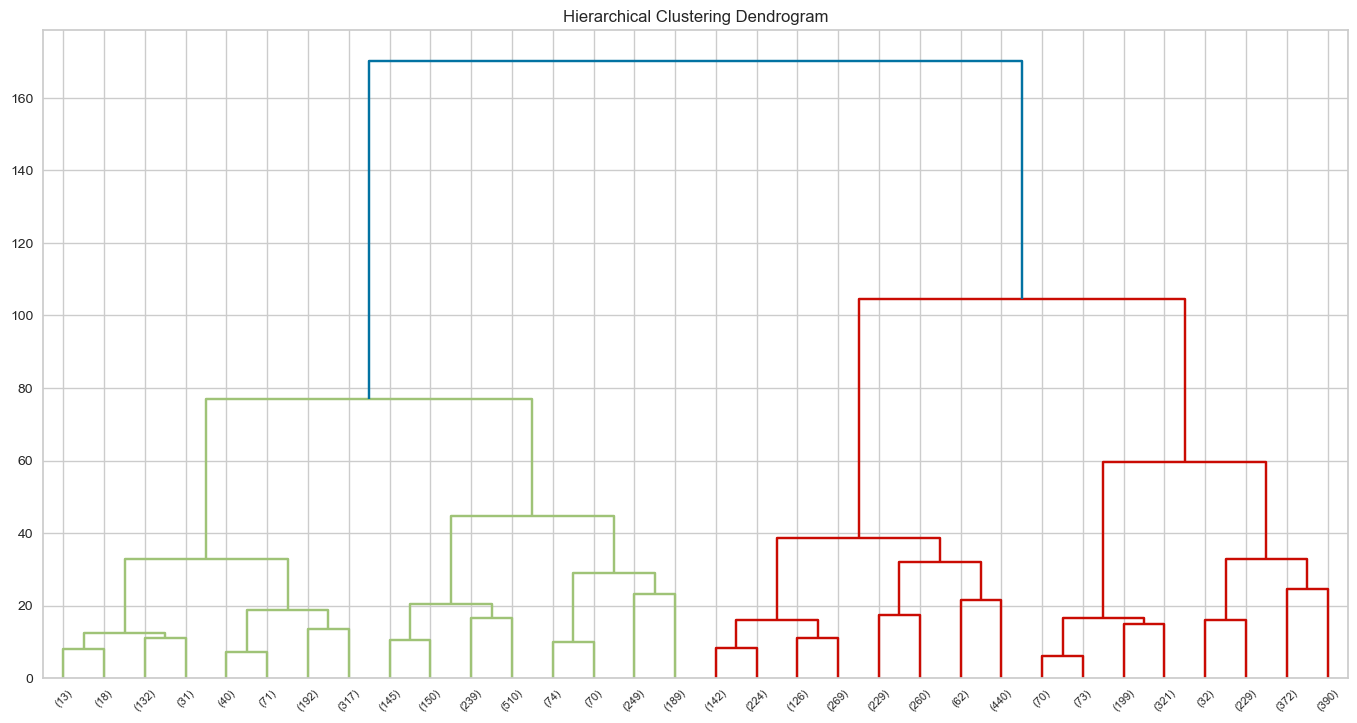

In [47]:
# importing dendrogram
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(agglo, **kwargs):
    
    counts = np.zeros(agglo.children_.shape[0])
    n_samples = len(agglo.labels_)
    for i, merge in enumerate(agglo.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([agglo.children_, agglo.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)
    

plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agglo, truncate_mode='level', p=4)
plt.show()

In [48]:
# Calculate silhouette score
silhouette_avg = silhouette_score(log_rfm[['Recency', 'Frequency', 'Monetary']], agglo.labels_)
# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.3013


In [49]:
# creating a list of labels generated by the kmeans model
labels_kmeans = list(kmeans.labels_)
# creating a list of labels generated by the agglomerative clustering model
labels_agglo = list(agglo.labels_)

In [50]:
# printing the size of the kmeans clusters
print('Cluster 0 - KMeans: ', labels_kmeans.count(0))
print('Cluster 1 - KMeans: ', labels_kmeans.count(1))
print('Cluster 2 - KMeans: ', labels_kmeans.count(2))
print('Cluster 3 - KMeans: ', labels_kmeans.count(3))

print()

# printing the size of the agglomerative clusters
print('Cluster 0 - Agglomerative: ', labels_agglo.count(0))
print('Cluster 1 - Agglomerative: ', labels_agglo.count(1))
print('Cluster 2 - Agglomerative: ', labels_agglo.count(2))
print('Cluster 3 - Agglomerative: ', labels_agglo.count(3))

Cluster 0 - KMeans:  1589
Cluster 1 - KMeans:  1422
Cluster 2 - KMeans:  1278
Cluster 3 - KMeans:  1424

Cluster 0 - Agglomerative:  1686
Cluster 1 - Agglomerative:  1626
Cluster 2 - Agglomerative:  1752
Cluster 3 - Agglomerative:  814


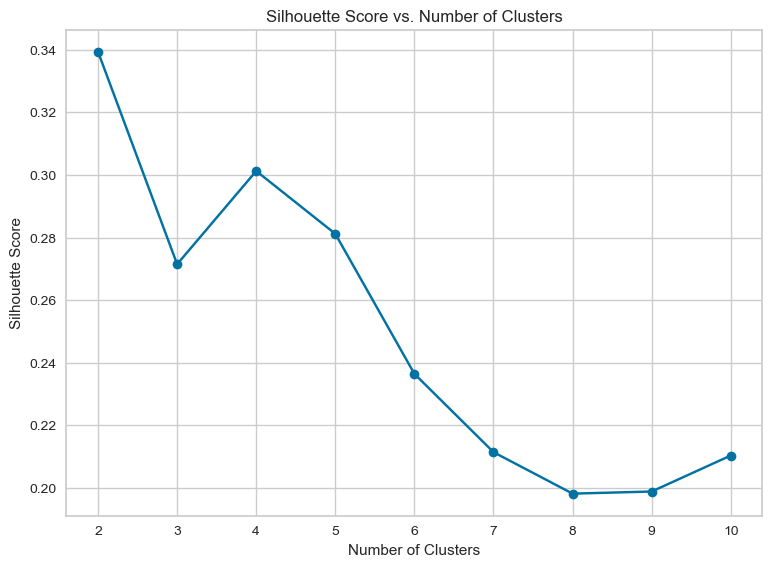

In [51]:
# Vary the number of clusters
cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    agglo.fit(log_rfm[['Recency', 'Frequency', 'Monetary']])
    silhouette_avg = silhouette_score(log_rfm[['Recency', 'Frequency', 'Monetary']], agglo.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

# PHASE 2: CLASSIFICATION MODEL

## Model training

### Split data into training and testing sets (use this the all following models)

In [52]:
#Devide dataset from K-means clustering method into training and testing set
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold

# Drop 'ClusterID' and 'Customer Type' from features
X = log_rfm_rmo.drop(['ClusterID', 'Customer Type'], axis=1)

# Convert 'ClusterID' to categorical and set as target variable
log_rfm_rmo['ClusterID'] = log_rfm_rmo['ClusterID'].astype('category')
y = log_rfm_rmo['ClusterID']

X_scaled = s_scaler.fit_transform(X)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Length of all data is:", "{:,}".format(len(X)))
print("Length of training set is:", "{:,}".format(len(X_train)))
print("Length of test set is:", "{:,}".format(len(X_test)))

Length of all data is: 5,713
Length of training set is: 3,999
Length of test set is: 1,714


## 1. MLP model

https://medium.com/@polanitzer/a-multi-layer-perceptron-classifier-in-python-predict-digits-from-gray-scale-images-of-hand-drawn-44936176be33

### Use cross-validation to tune hyperparameters and then train the best model

In [53]:
from sklearn.neural_network import MLPClassifier

# Define the MLP model
mlp = MLPClassifier(max_iter=500, random_state=42)

# Set up the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# Set up GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object 
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Retrieve the best model from the grid search
best_mlp = grid_search.best_estimator_

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters found:  {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}


### Model Evaluation

Accuracy on test set: 99.59%
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       482
           1       1.00      1.00      1.00       412
           2       1.00      1.00      1.00       376
           3       0.99      1.00      0.99       444

    accuracy                           1.00      1714
   macro avg       1.00      1.00      1.00      1714
weighted avg       1.00      1.00      1.00      1714

Confusion Matrix:
 [[479   0   1   2]
 [  0 410   0   2]
 [  0   1 375   0]
 [  0   1   0 443]]


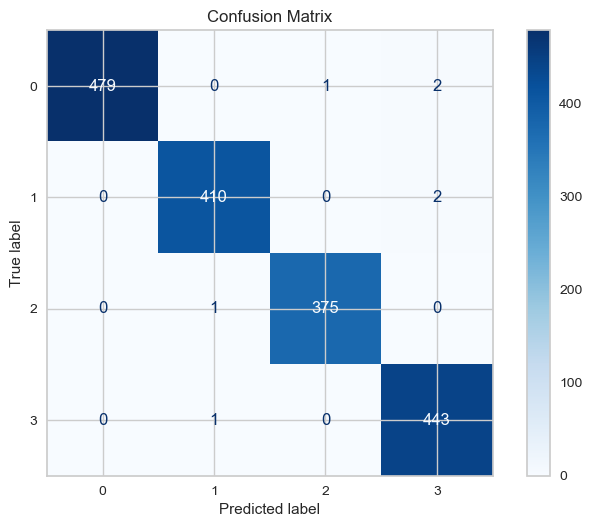

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Predict on the test set
y_pred_mlp = best_mlp.predict(X_test)

# Evaluate the model
print("Accuracy on test set: {:.2%}".format(accuracy_score(y_test, y_pred_mlp)))
print(classification_report(y_test, y_pred_mlp))

# Confusion matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
print("Confusion Matrix:\n", conf_matrix_mlp)

# Visualize the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_mlp).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


## 2. Random Forest 
https://www.datacamp.com/tutorial/random-forests-classifier-python

### Use cross-validation to tune hyperparameters and then train the best model

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Hyperparameter Tuning
param_dist = {'n_estimators': randint(50, 500),
              'max_depth': randint(1, 20)}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)  # Set random_state for reproducibility

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions=param_dist, 
                                 n_iter=10,  # Increased iterations
                                 cv=5, 
                                 random_state=42)  # Set random_state for reproducibility
# Fit the random search object to the data
rand_search.fit(X_train, y_train)
print('Best hyperparameters:', rand_search.best_params_)

#Train the best model
best_rf = rand_search.best_estimator_

Best hyperparameters: {'max_depth': 12, 'n_estimators': 463}


### Model Evaluation


accuracy_score on test dataset :  0.9778296382730455
Confusion Matrix:
[[475   0   5   2]
 [  0 405   0   7]
 [  3   2 369   2]
 [  6   6   5 427]]


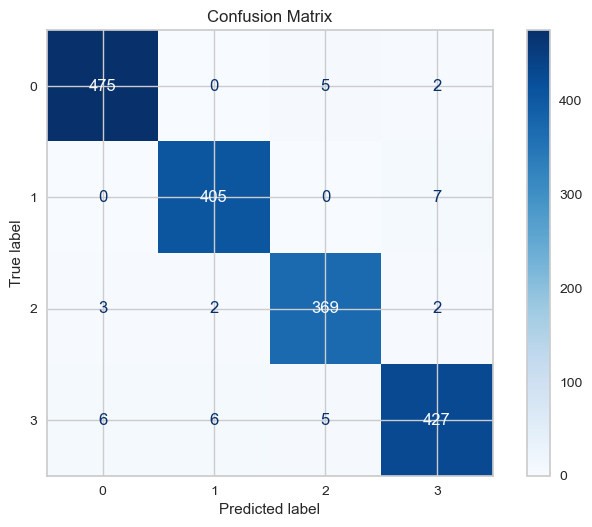


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       482
           1       0.98      0.98      0.98       412
           2       0.97      0.98      0.98       376
           3       0.97      0.96      0.97       444

    accuracy                           0.98      1714
   macro avg       0.98      0.98      0.98      1714
weighted avg       0.98      0.98      0.98      1714



In [57]:
# Generate predictions with the best model
y_pred_rf = best_rf.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,y_pred_rf)
print('\naccuracy_score on test dataset : ', accuracy_test)

# Evaluate the model
print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# Visualize the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

## 3. XGBoost

### Use cross-validation to tune hyperparameters and then train the model

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(1, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),  # Values between 0.5 and 1.0
    'colsample_bytree': uniform(0.5, 0.5),  # Values between 0.5 and 1.0
}

# Initialize the XGBoost classifier without the deprecated parameter
xgb_clf = xgb.XGBClassifier(eval_metric='mlogloss')

# Create a Stratified K-Folds cross-validator
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Use RandomizedSearchCV to find the best hyperparameters
rand_search = RandomizedSearchCV(
    xgb_clf, 
    param_distributions=param_dist, 
    n_iter=50, 
    cv=skf, 
    random_state=42, 
    n_jobs=-1,
    verbose=2,  # Show progress
    scoring='accuracy'  # You can specify a scoring metric
)

# Fit the model
rand_search.fit(X_train, y_train)

# Get the best model
best_xgb = rand_search.best_estimator_
print('Best hyperparameters:', best_xgb)


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5027610585618012, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25463842853645025,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=441, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


### Model Evaluation


accuracy_score on test dataset :  0.9836639439906651
Confusion Matrix:
[[474   0   6   2]
 [  0 409   1   2]
 [  1   2 371   2]
 [  8   2   2 432]]


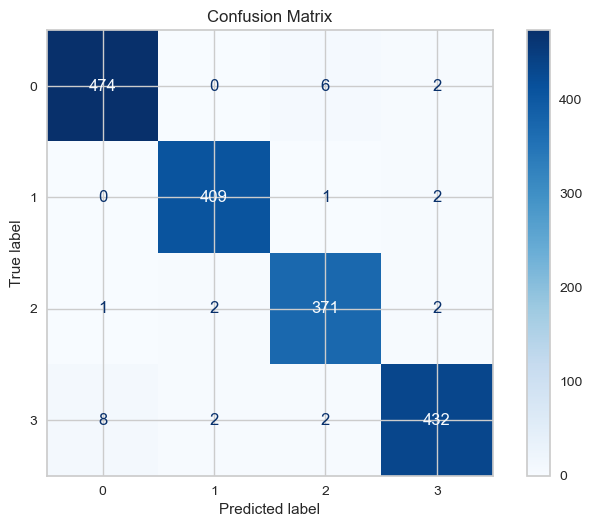


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       482
           1       0.99      0.99      0.99       412
           2       0.98      0.99      0.98       376
           3       0.99      0.97      0.98       444

    accuracy                           0.98      1714
   macro avg       0.98      0.98      0.98      1714
weighted avg       0.98      0.98      0.98      1714



In [64]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred_xgb = best_xgb.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,y_pred_xgb)
print('\naccuracy_score on test dataset : ', accuracy_test)

# Evaluate the model
print("Confusion Matrix:")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

# Visualize the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_xgb).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))